# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
type(df)

pandas.core.frame.DataFrame

In [278]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [281]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

## Rename all the columns to lower case

In [274]:
#Your code here
df.columns = [x.lower() for x in df.columns]
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [158]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [161]:
df['linename'] = df.index
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'division', 'date', 'time', 'desc',
       'entries',
       'exits                                                               ',
       'linename'],
      dtype='object')

In [165]:
# Your code here
df.index = range(len(df))
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits,linename
0,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,NQR456W
1,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,NQR456W
2,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,NQR456W
3,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,NQR456W
4,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,NQR456W


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [276]:
# Your code here
df['Num_lines'] = df['linename'].str.len()
df = df.sort_values(['Num_lines'], ascending=False)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_lines
132292,R151,R033,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name

In [282]:
def clean(col_name):
    cleaned = col_name.title() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [283]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [284]:
#Checking the output, we can see the results.
df.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               '],
      dtype='object')

In [270]:
df.E

SyntaxError: EOL while scanning string literal (<ipython-input-270-5801d355c766>, line 1)

## Compare subway traffic by day of the week. Display this as a graph.

In [316]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline 

In [288]:
df.Date = pd.to_datetime(df.Date)

In [289]:
df['Day_of_week'] = df.Date.dt.day_name()

In [300]:
df_en = df.loc[:, ["Entries", "Day_of_week"]]
df_sums = dict(df.groupby('Day_of_week')['Entries'].sum())
df_sums

{'Friday': 1110224700078,
 'Monday': 1114237052454,
 'Saturday': 1115661545514,
 'Sunday': 1192306179082,
 'Thursday': 1122723988662,
 'Tuesday': 1143313287046,
 'Wednesday': 1123655222441}

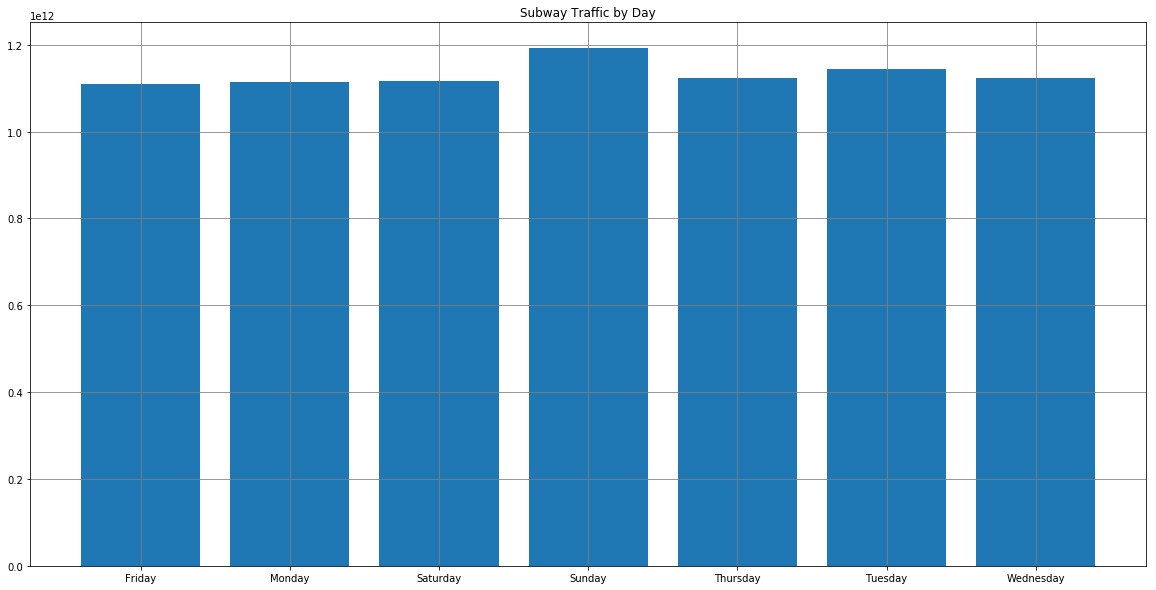

In [324]:
plt.figure(figsize=(20,10))
plt.bar(df_sums.keys(), df_sums.values())
plt.grid(axis='both', color='gray')
plt.
plt.title('Subway Traffic by Day')

plt.show()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

1122830850136.2
1711814635055.0


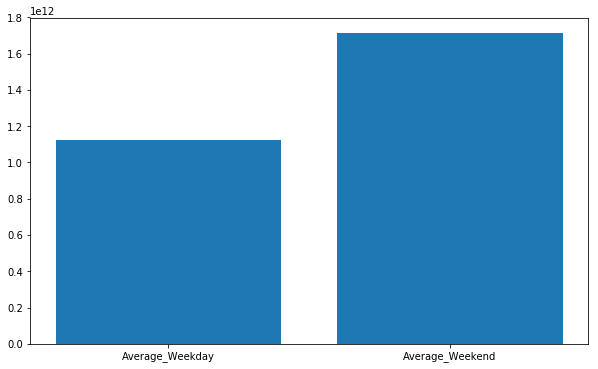

In [362]:
#Your code here
df_weekend = df_sums['Saturday'] + df_sums['Sunday']/2
df_weekday = sum(df_sums.values())
df_weekday = df_weekday - df_sums['Saturday'] - df_sums['Sunday']
df_weekday = df_weekday/5
print(df_weekday)
print(df_weekend)
df_comp = {'Average_Weekday':1122830850136.2, 'Average_Weekend':1711814635055.0}
plt.figure(figsize=(10,6))
plt.bar(df_comp.keys(), df_comp.values())
plt.show()

## Drop a couple of columns

In [360]:
# Your code here
df = df.drop(columns='Desc', axis=1)

df.head()

,C/A,Station,Linename,Division,Date,Time,Entries,Exits,Day_of_week
0,A002,59 ST,NQR456W,BMT,2018-08-25,00:00:00,6736067,2283184,Saturday
1,A002,59 ST,NQR456W,BMT,2018-08-25,04:00:00,6736087,2283188,Saturday
2,A002,59 ST,NQR456W,BMT,2018-08-25,08:00:00,6736105,2283229,Saturday
3,A002,59 ST,NQR456W,BMT,2018-08-25,12:00:00,6736180,2283314,Saturday
4,A002,59 ST,NQR456W,BMT,2018-08-25,16:00:00,6736349,2283384,Saturday


## Summary

Great! You practiced your data cleanup-skills using Pandas.